# Data Explorer

This notebook visualizes what is going on in the dataset. 

Each `.aedat4` file contains an event stream that contains event batches.
Event batches contains events that occured in each frame. 
The number of events in each batch can vary, especially for each letter and each subject.

This notebook aims to help us understand our dataset better and how the authors collected it.
It will assist us in passing the data as input spikes to the convolutional spiking neural network we created.

We created a utility module that allows us to easily use visualization functions. This module is under `utils/helper_funcs.py`. 

#### Helpful References:
* [IniVation DV-Processing API Documentation](https://dv-processing.inivation.com/rel_1_7/api.html#api)
   * Particularly, the [`Accumulator` class](https://dv-processing.inivation.com/rel_1_7/api.html#_CPPv4N2dv11AccumulatorE) is helpful in explaining how events are stored in event batches

## 0 - Import packages and define helper functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dv_processing as dv
import os

from helper_funcs import *

## 1 - Visualize Sample Image

This section aims to reveal information in the dataset regarding an example recording. We chose to visualize Subject 1's recording for the letter `f`. The sample is visualized as an image from 100 milliseconds worth of data from the ASL-DVS dataset in the form of AEDAT4.0 files. We can use our `helper_funcs` module to easily parse this file.

In [2]:
subject = 1
letter = 'f'
AEDAT = f"../data/aedat/subject{subject}/{letter}.aedat4"
GIF = False

record = dv.io.MonoCameraRecording(AEDAT)
duration = getRecordingDuration(record)
print(f"{AEDAT} duration: {duration / 1e6} secs")


../data/aedat/subject1/f.aedat4 duration: 81.728724 secs


Resolution: (240, 180)
Number of events in sample: 1552
Sample duration: 10010 microsecs
Image dims: (180, 240, 3)


Text(0.5, 1.0, 'Subject 1 Letter f - Frame 1')

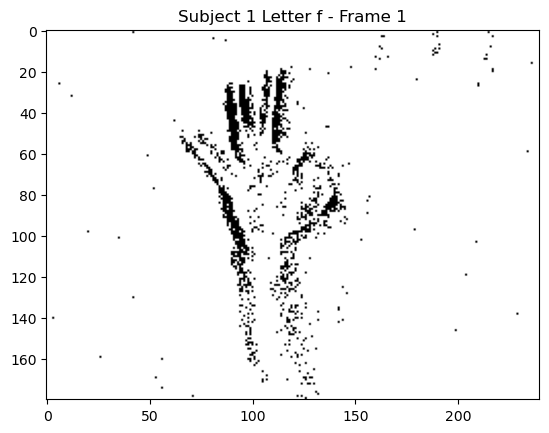

In [6]:
resolution = getRecordingResolution(record)
print("Resolution:", resolution)

sample = record.getNextEventBatch()
sample_duration = getSampleDuration(sample)
print(f"Number of events in sample: {len(sample.numpy())}")
print(f"Sample duration: {sample_duration} microsecs")

img = dv_sample_2_image(resolution, sample)
print("Image dims:", img.shape) # Image in 3 channels 

plt.imshow(img)
plt.title("Subject 1 Letter f - Frame 1")

## 2 - Visualize Sample Distributions

In this section, we visualize the number of samples recorded from each subject for each class. There are 3 types of graphs being shown here: 
1) Total Samples per Letter from All Subjects
2) Vowel Occurences Across All Subjects
3) Total Samples Per Letter per Subject

In [34]:
# Letters extracted from filenames
letters = [i.split('/')[0].split('.')[0] for i in sorted(os.listdir("../data/aedat/subject1")) if "aedat" in i]
letters.append('z')

# Subjects to iterate over
subjects = [1, 2, 3, 4, 5]

# Track sample sizes for each letter
sample_sizes = {}

# Subset of vowels to show distributions
vowels = ['a', 'e', 'i', 'o', 'u']

# Dictionaries to store sample frequencies for each subject and vowel
sub = {subject: {} for subject in subjects}
v = {subject: {} for subject in subjects}

# Iterate over each letter
for letter in letters:
    # Iterate over each subject
    for subject in subjects:
        FILE = f"../data/csv/subject{subject}/{letter}_events.csv"

        if os.path.isfile(FILE):
            df = pd.read_csv(FILE)
            sample_freq, _ = get_sample_freq_from_batch(df, None)
            sub[subject][letter] = len(sample_freq) 
        else:
            sub[subject][letter] = 0

In [35]:
# sample_freqs = {key1: {key2: len(val2) for key2, val2 in val1.items()} for key1, val1 in sub.items()}
print("Total sampling frequency:\n", sub)

Total sampling frequency:
 {1: {'a': 2663, 'b': 4836, 'c': 6608, 'd': 7583, 'e': 6547, 'f': 8084, 'g': 1010, 'h': 8096, 'i': 6659, 'k': 7450, 'l': 6889, 'm': 8111, 'n': 7102, 'o': 4252, 'p': 7310, 'q': 7864, 'r': 6661, 's': 6613, 't': 6991, 'u': 7695, 'v': 6955, 'w': 6928, 'x': 7356, 'y': 7019, 'z': 0}, 2: {'a': 6558, 'b': 9941, 'c': 8311, 'd': 5390, 'e': 6722, 'f': 6500, 'g': 6709, 'h': 6531, 'i': 7029, 'k': 6862, 'l': 6701, 'm': 6385, 'n': 6304, 'o': 6047, 'p': 6783, 'q': 6106, 'r': 6750, 's': 7045, 't': 7509, 'u': 6526, 'v': 6868, 'w': 6596, 'x': 6684, 'y': 6286, 'z': 0}, 3: {'a': 7814, 'b': 9268, 'c': 8213, 'd': 7067, 'e': 8657, 'f': 6892, 'g': 7258, 'h': 7225, 'i': 6434, 'k': 6985, 'l': 6899, 'm': 6545, 'n': 7046, 'o': 7896, 'p': 6197, 'q': 6950, 'r': 7196, 's': 7206, 't': 6897, 'u': 5902, 'v': 6460, 'w': 6640, 'x': 8220, 'y': 6251, 'z': 0}, 4: {'a': 5910, 'b': 7213, 'c': 6925, 'd': 6571, 'e': 6473, 'f': 6981, 'g': 3849, 'h': 8256, 'i': 6525, 'k': 5943, 'l': 6457, 'm': 6586, 'n': 

In [36]:
v_freqs = {key1: {key2: val2 for key2, val2 in val1.items() if key2 in vowels} for key1, val1 in sub.items()}
print("Vowel sampling frequency:\n", v_freqs)

Vowel sampling frequency:
 {1: {'a': 2663, 'e': 6547, 'i': 6659, 'o': 4252, 'u': 7695}, 2: {'a': 6558, 'e': 6722, 'i': 7029, 'o': 6047, 'u': 6526}, 3: {'a': 7814, 'e': 8657, 'i': 6434, 'o': 7896, 'u': 5902}, 4: {'a': 5910, 'e': 6473, 'i': 6525, 'o': 6470, 'u': 6923}, 5: {'a': 17536, 'e': 20664, 'i': 18111, 'o': 18585, 'u': 19408}}


In [45]:
total_samples_per_letter = {key: sum(val[key] for val in sub.values()) for key in sub[1].keys()}
print("Total samples per letter:\n", total_samples_per_letter)

Total samples per letter:
 {'a': 40481, 'b': 49949, 'c': 43108, 'd': 42240, 'e': 49063, 'f': 46786, 'g': 34995, 'h': 51738, 'i': 44758, 'k': 47822, 'l': 46688, 'm': 46150, 'n': 48477, 'o': 43250, 'p': 46153, 'q': 46030, 'r': 46985, 's': 47865, 't': 46968, 'u': 46454, 'v': 48276, 'w': 47476, 'x': 49203, 'y': 27026, 'z': 19809}


#### Total Samples per Letter from All Subjects

Text(0, 0.5, 'Number of Samples')

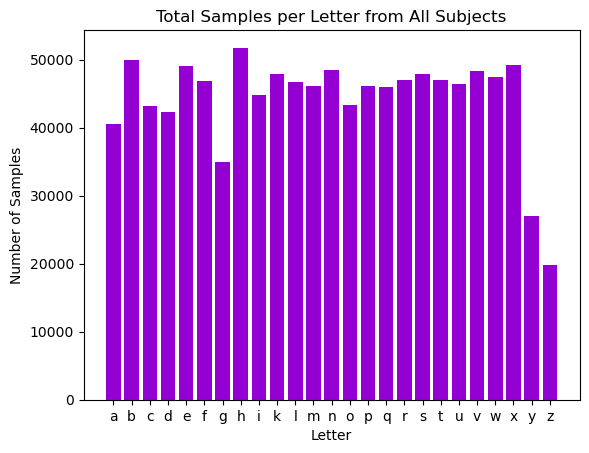

In [77]:
plt.bar(total_samples_per_letter.keys(), total_samples_per_letter.values(), color="darkviolet")
plt.title("Total Samples per Letter from All Subjects")
plt.xlabel("Letter")
plt.ylabel("Number of Samples")

#### Vowel Occurences Across All Subjects

/var/folders/cr/6qwltv_55nn601gfq05w5r2c0000gn/T/ipykernel_86762/2781419146.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(vowels)


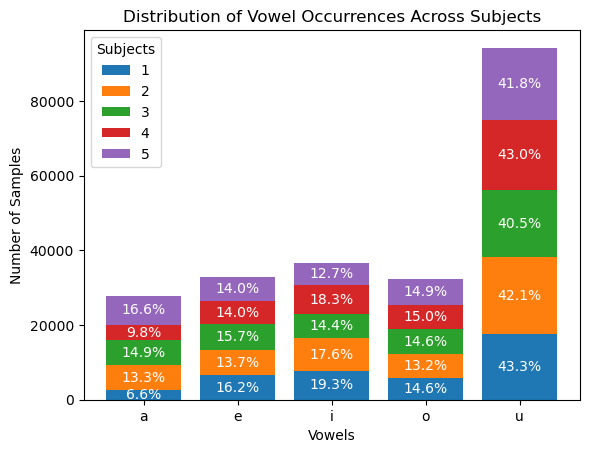

In [63]:
vowel_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Initialize bottom values for the first vowel
bottom = np.zeros(len(subjects))

# Plotting the stacked bar graph
fig, ax = plt.subplots()
for vowel, color in zip(vowels, vowel_colors):
    heights = [sub[subject][vowel] for subject in subjects]
    ax.bar(subjects, heights, bottom=bottom, color=color)
    # Calculate percentages and display them within the bars
    for i, (subject, height) in enumerate(zip(subjects, heights)):
        percentage = height / sum(heights) * 100
        ax.text(subject, bottom[i] + height / 2, f"{percentage:.1f}%", ha='center', va='center', color='white')
    bottom += heights

ax.set_title("Distribution of Vowel Occurrences Across Subjects")
ax.set_ylabel("Number of Samples")
ax.set_xlabel("Vowels")
ax.set_xticklabels(vowels)
ax.legend(subjects, title='Subjects')

plt.xticks(subjects)
plt.show()

#### Total Samples Per Letter per Subject

Text(0, 0.5, 'Number of Samples')

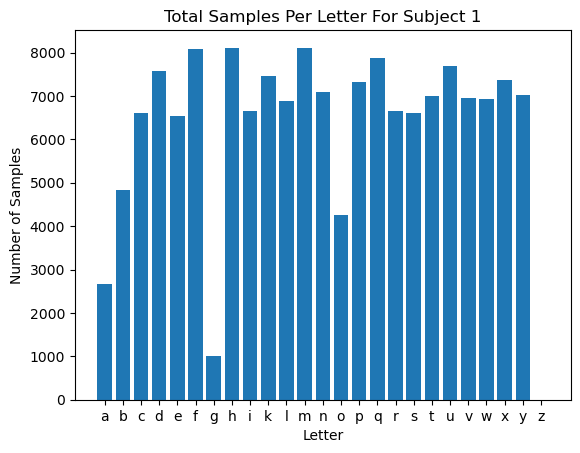

In [71]:
plt.bar(sub[1].keys(), sub[1].values(), color="tab:blue")
plt.title("Total Samples Per Letter For Subject 1")
plt.xlabel("Letter")
plt.ylabel("Number of Samples")

Text(0, 0.5, 'Number of Samples')

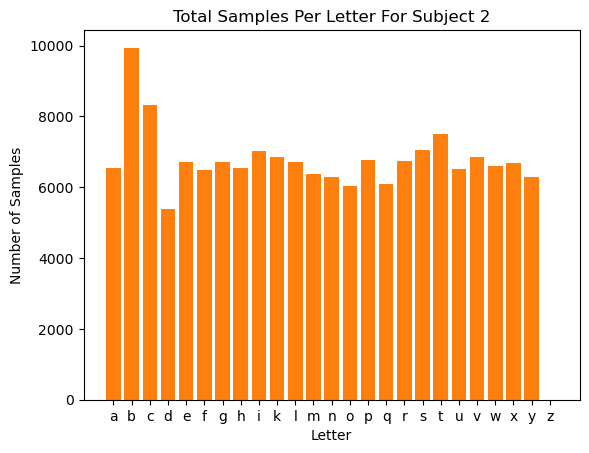

In [72]:
plt.bar(sub[2].keys(), sub[2].values(), color="tab:orange")
plt.title("Total Samples Per Letter For Subject 2")
plt.xlabel("Letter")
plt.ylabel("Number of Samples")


Text(0, 0.5, 'Number of Samples')

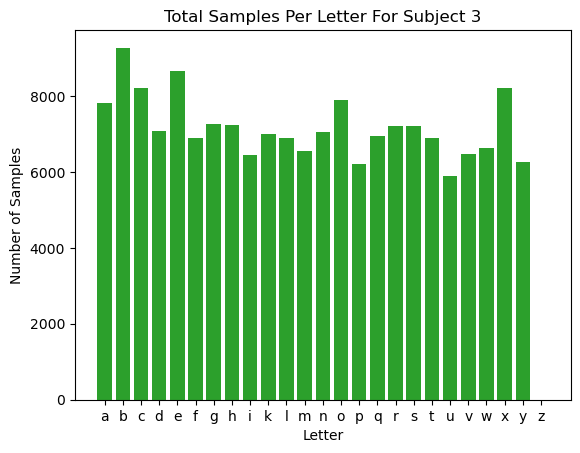

In [73]:
plt.bar(sub[3].keys(), sub[3].values(), color="tab:green")
plt.title("Total Samples Per Letter For Subject 3")
plt.xlabel("Letter")
plt.ylabel("Number of Samples")

Text(0, 0.5, 'Number of Samples')

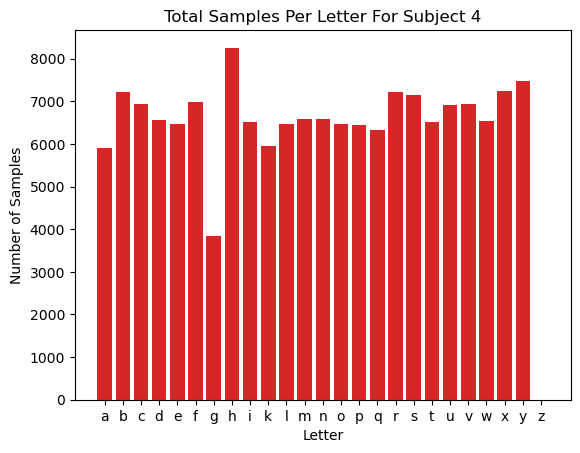

In [74]:

plt.bar(sub[4].keys(), sub[4].values(), color="tab:red")
plt.title("Total Samples Per Letter For Subject 4")
plt.xlabel("Letter")
plt.ylabel("Number of Samples")

Text(0, 0.5, 'Number of Samples')

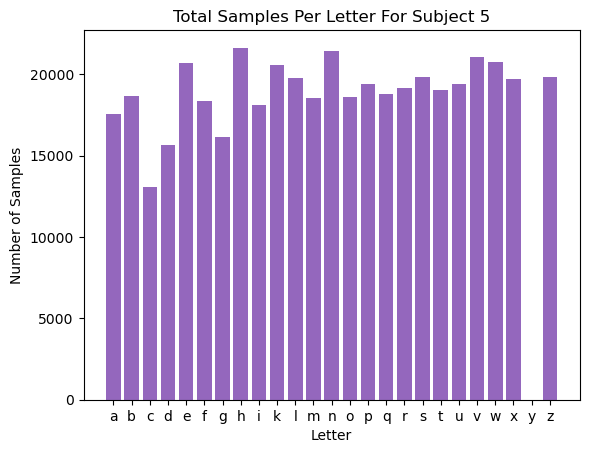

In [75]:

plt.bar(sub[5].keys(), sub[5].values(), color="tab:purple")
plt.title("Total Samples Per Letter For Subject 5")
plt.xlabel("Letter")
plt.ylabel("Number of Samples")

## 3 - Visualize Events Per Batch

In this section, we visualize the number of events that occur in each batch. The term "batch" here refers to a time window that is chosen to split the recording into. In this case, the batch size or time window is 3 seconds long, with each sample being 100 milliseconds long. 

Here we have 3 types of graphs:
1) Number of Events per Batch for a Subject and Letter
2) Number of Events per Sample in a Batch
3) Sampling Frequency (in Events) for Multiple Batches

These graphs reveal the subject’s hand movement patterns in the recording via the oscillation pattern seen in the 2nd and 3rd graphs. 

### Helper Functions

In [11]:
def plot_batches(batches, subject, letter):
    """
    Plot the number of events per batch.

    Args:
    batches (pd.DataFrame): The DataFrame containing batch information.
    subject (int): The subject number.
    letter (str): The letter.
    """
    plt.clf()
    plt.bar(batches['batch'], batches['num_events'], color="tab:blue")
    plt.title(f"Number of Events per Batch - Subject {subject} Letter {letter}")
    plt.xlabel("Batch")
    plt.ylabel("Number of Events")
    
def plot_sample_freq(sample_freq, batchN):
    """
    Plot the number of events in each sample.

    Args:
    sample_freq (np.ndarray): Array containing the number of events in each sample.
    batchN (int): The batch number.
    """

    peak_events = np.max(sample_freq)
    max_idx = np.where(sample_freq == peak_events)[0]
    print(f"Maximum # of events in batch: {peak_events} @ Sample {max_idx}")

    plt.clf()
    x = np.arange(len(sample_freq))
    plt.plot(x, sample_freq, marker='.', color="tab:blue")
    plt.scatter(max_idx, peak_events, marker="o", color='tab:red', zorder=3)
    plt.xlabel("Sample")
    plt.ylabel("Number of Events")
    plt.title(f"Number of Events in Each Sample - Batch {batchN}")

def cut_events(sample_freqN, threshold=1000):
    cut = np.where(sample_freqN > threshold)[0]
    cut_points = np.array([sample_freqN[i] for i in cut])
    return cut_points

### Data Settings

In [12]:
# General settings
subject = 1
letter = 'f'
AEDAT = f"../data/aedat/subject{subject}/{letter}.aedat4"
CSV = f"../data/csv/subject{subject}/{letter}_events.csv"
DEBUG = True  # Debug mode - print statements

# Set time to split recording
batch_time = int(3e6) # 3e6 microseconds = 3 seconds worth of events

### Recording Metadata

This cell reads in the entire recording for the `subject` and `letter` specified. Then, it will split the reocrding into batches according the the specified `batch_time` (in microseconds). It will then store the batch metadata into a DataFrame for ease of use later.

In [13]:
recording = dv.io.MonoCameraRecording(AEDAT) # Read in whole entire recording
metadata = split_recording(recording, batch_time, DEBUG) # Track metadata - (resolution, batch_size, num_batches, t0, t1)
batches = get_batches(recording, metadata) # Creates batches from recording
df = pd.read_csv(CSV) # Read entire CSV from converted AEDAT4.0 file

batches.iloc[:5] # Print first 5 rows of DataFrame

Event resolution: (240, 180)
Recording duration: 81.728724 secs
Start timestamp: 124288256
End timestamp: 206016980


,batch,t0,t1,duration,num_events
0,0,124288256,127288256,2999999,275695
0,1,127288256,130288256,2999848,360538
0,2,130288256,133288256,2999945,323390
0,3,133288256,136288256,2999980,315518
0,4,136288256,139288256,2999948,317157


### Visualize Events Per Batch

For each batch (as seen above), you can see how the number of events varies at different points in the recording. This seems to correlate to the event distribution per sample that we see in the next section.

Text(0, 0.5, 'Number of Events')

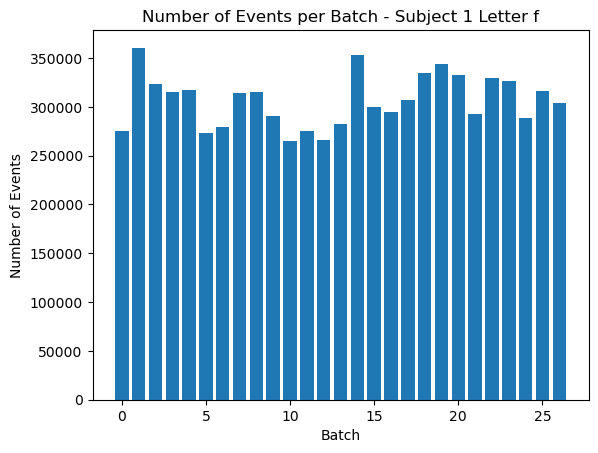

In [14]:
plt.bar(batches['batch'], batches['num_events'], color="tab:blue")
plt.title(f"Number of Events per Batch - Subject {subject} Letter {letter}")
plt.xlabel("Batch")
plt.ylabel("Number of Events")

### Visualize  Events Per Sample in Batch

For a single batch, we can observe that the number of events peaks when the subject's hand is in peak motion. Peak motion correlates to maximum kinetic energy in the hand's oscillation back and forth within the frame. Between motion inflection points (left, right), we see that there are approximately 0 events captured by the camera. This makes sense as the DVS camera will only pick up changes in pixels, so if there is no motion, then there are no events occurring.

Number of events in Batch 0: 275695
Maximum # of events in batch: 10390 @ Sample [239]


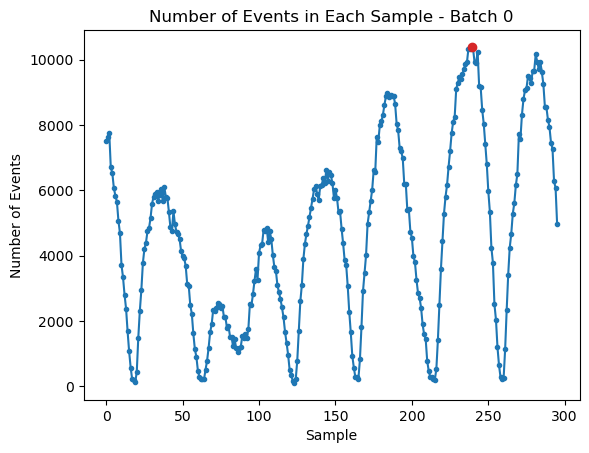

In [15]:
batchN = 0 # Toggle this to get another batch recording
batch = get_batch_indices(df, batches, batchN, DEBUG)
sample_freqN, _ = get_sample_freq_from_batch(batch, metadata)

plot_sample_freq(sample_freqN, batchN)

Number of events in Batch 0: 275695
Number of events in Batch 13: 282040
Number of events in Batch 26: 304038


Text(0.5, 1.0, 'Sampling Frequency (in Events) for Each Batch')

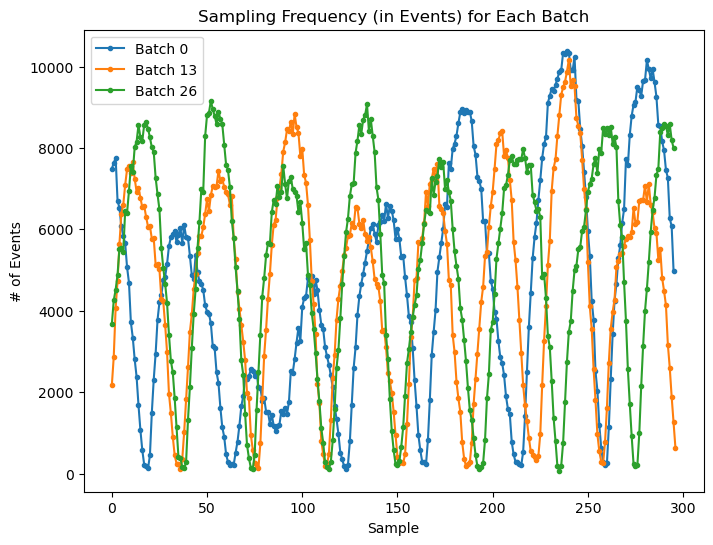

In [16]:
batchN = [0, 13, 26] # Toggle this to see any batch

plt.figure(figsize=(8, 6))
for i, b in enumerate(batchN):
    batch = get_batch_indices(df, batches, b, PRINT=True)
    sample_freq, _ = get_sample_freq_from_batch(batch, metadata)

    plt.plot(np.arange(0, len(sample_freq)), sample_freq, marker='.', label=f"Batch {b}")

plt.legend()
plt.xlabel("Sample")
plt.ylabel("# of Events")
plt.title("Sampling Frequency (in Events) for Each Batch")